<a href="https://colab.research.google.com/github/devroopsaha744/MLCOE-TASK1-Usedcars_dataset-EDA/blob/main/MLCOE_task1_EDA_used_cars_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## **Data collection and Cleaning**

In [176]:
df = pd.read_csv("/content/car details v4.csv")

In [177]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [178]:
df.shape

(2059, 20)

In [179]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [180]:
df.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [181]:
df['Engine'] = df['Engine'].str.split(" ").str[0]
df['Engine'] = pd.to_numeric(df['Engine'])

In [182]:
df = df[df['Max Power'].str.split(' ').str[1] == 'bhp']

In [183]:
df['rpm @ max_power'] = df['Max Power'].str.split(' ').str[3]
df['Max Power'] = df['Max Power'].str.split(' ').str[0]

<ipython-input-183-39357eea7a0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rpm @ max_power'] = df['Max Power'].str.split(' ').str[3]
<ipython-input-183-39357eea7a0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max Power'] = df['Max Power'].str.split(' ').str[0]


In [184]:
df['rpm @ max_torque'] = df['Max Torque'].str.split(' ').str[3]
df['Max Torque'] = df['Max Torque'].str.split(' ').str[0]

<ipython-input-184-1a6012c53e5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rpm @ max_torque'] = df['Max Torque'].str.split(' ').str[3]
<ipython-input-184-1a6012c53e5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max Torque'] = df['Max Torque'].str.split(' ').str[0]


In [185]:
df['Max Power'] = pd.to_numeric(df['Max Power'])
df['Max Torque'] = pd.to_numeric(df['Max Torque'])

df['rpm @ max_power'] = pd.to_numeric(df['rpm @ max_power'])
df['rpm @ max_torque'] = pd.to_numeric(df['rpm @ max_torque'])

<ipython-input-185-cbcd0dacac54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max Power'] = pd.to_numeric(df['Max Power'])
<ipython-input-185-cbcd0dacac54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max Torque'] = pd.to_numeric(df['Max Torque'])
<ipython-input-185-cbcd0dacac54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [186]:
df.isnull().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                 0
Max Power              0
Max Torque             0
Drivetrain             5
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    42
rpm @ max_power        4
rpm @ max_torque       0
dtype: int64

In [187]:
df = df.dropna()

In [188]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
rpm @ max_power       0
rpm @ max_torque      0
dtype: int64

In [189]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'rpm @ max_power',
       'rpm @ max_torque'],
      dtype='object')

In [190]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm @ max_power,rpm @ max_torque
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,6000.0,4500
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,4000.0,2000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,6000.0,4000
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,6000.0,4200
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,3400.0,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,...,85.0,113.0000,FWD,3775.0,1680.0,1620.0,5.0,43.0,6000.0,4500
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,138.0,330.0000,FWD,4585.0,1890.0,1785.0,7.0,70.0,3750.0,1600
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,55.0,75.0000,FWD,3495.0,1550.0,1500.0,5.0,32.0,5500.0,4000
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,70.0,102.0000,FWD,3795.0,1680.0,1427.0,5.0,45.0,6250.0,4000


## **Exploratory Data Analysis**

In [191]:
sns.set()

In [192]:
#Understanding the summary statistics of the Numerical features
df.describe()

,Price,Year,Kilometer,Engine,Max Power,Max Torque,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm @ max_power,rpm @ max_torque
count,1.802000e+03,1802.000000,1.802000e+03,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000
mean,1.759515e+06,2016.969478,5.200916e+04,1678.322420,129.146892,245.264799,4283.273585,1769.886792,1589.879023,5.301332,52.203274,4823.091010,2617.857936
std,2.457563e+06,2.871225,5.930951e+04,630.262203,63.916349,138.524154,434.197783,131.575637,134.221211,0.809911,15.034851,1098.272917,1207.089159
min,1.410000e+05,1988.000000,0.000000e+00,793.000000,39.000000,54.000000,3395.000000,1475.000000,1213.000000,2.000000,27.000000,2910.000000,150.000000
25%,5.250000e+05,2015.000000,2.800000e+04,1197.000000,83.000000,115.000000,3985.000000,1695.000000,1485.000000,5.000000,42.000000,4000.000000,1600.000000
50%,8.625000e+05,2017.000000,4.800000e+04,1498.000000,116.000000,200.000000,4357.000000,1775.000000,1544.000000,5.000000,50.000000,4200.000000,1800.000000
75%,1.950000e+06,2019.000000,6.950000e+04,1995.000000,170.000000,350.000000,4620.000000,1831.000000,1671.000000,5.000000,60.000000,6000.000000,4000.000000
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,660.000000,780.000000,5569.000000,2220.000000,1995.000000,8.000000,105.000000,8250.000000,5600.000000


In [193]:
df.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                float64
Max Power             float64
Max Torque            float64
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
rpm @ max_power       float64
rpm @ max_torque        int64
dtype: object

In [194]:
df1 = df.copy()

In [195]:
df = df.drop(['Make', 'Model', 'Transmission', 'Fuel Type', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Year', 'Seating Capacity' ], axis =1)

In [196]:
df

,Price,Kilometer,Engine,Max Power,Max Torque,Length,Width,Height,Fuel Tank Capacity,rpm @ max_power,rpm @ max_torque
0,505000,87150,1198.0,87.0,109.0000,3990.0,1680.0,1505.0,35.0,6000.0,4500
1,450000,75000,1248.0,74.0,190.0000,3995.0,1695.0,1555.0,42.0,4000.0,2000
2,220000,67000,1197.0,79.0,112.7619,3585.0,1595.0,1550.0,35.0,6000.0,4000
3,799000,37500,1197.0,82.0,113.0000,3995.0,1745.0,1510.0,37.0,6000.0,4200
4,1950000,69000,2393.0,148.0,343.0000,4735.0,1830.0,1795.0,55.0,3400.0,1400
...,...,...,...,...,...,...,...,...,...,...,...
2053,245000,79000,1197.0,85.0,113.0000,3775.0,1680.0,1620.0,43.0,6000.0,4500
2054,850000,90300,2179.0,138.0,330.0000,4585.0,1890.0,1785.0,70.0,3750.0,1600
2055,275000,83000,814.0,55.0,75.0000,3495.0,1550.0,1500.0,32.0,5500.0,4000
2056,240000,73000,1196.0,70.0,102.0000,3795.0,1680.0,1427.0,45.0,6250.0,4000


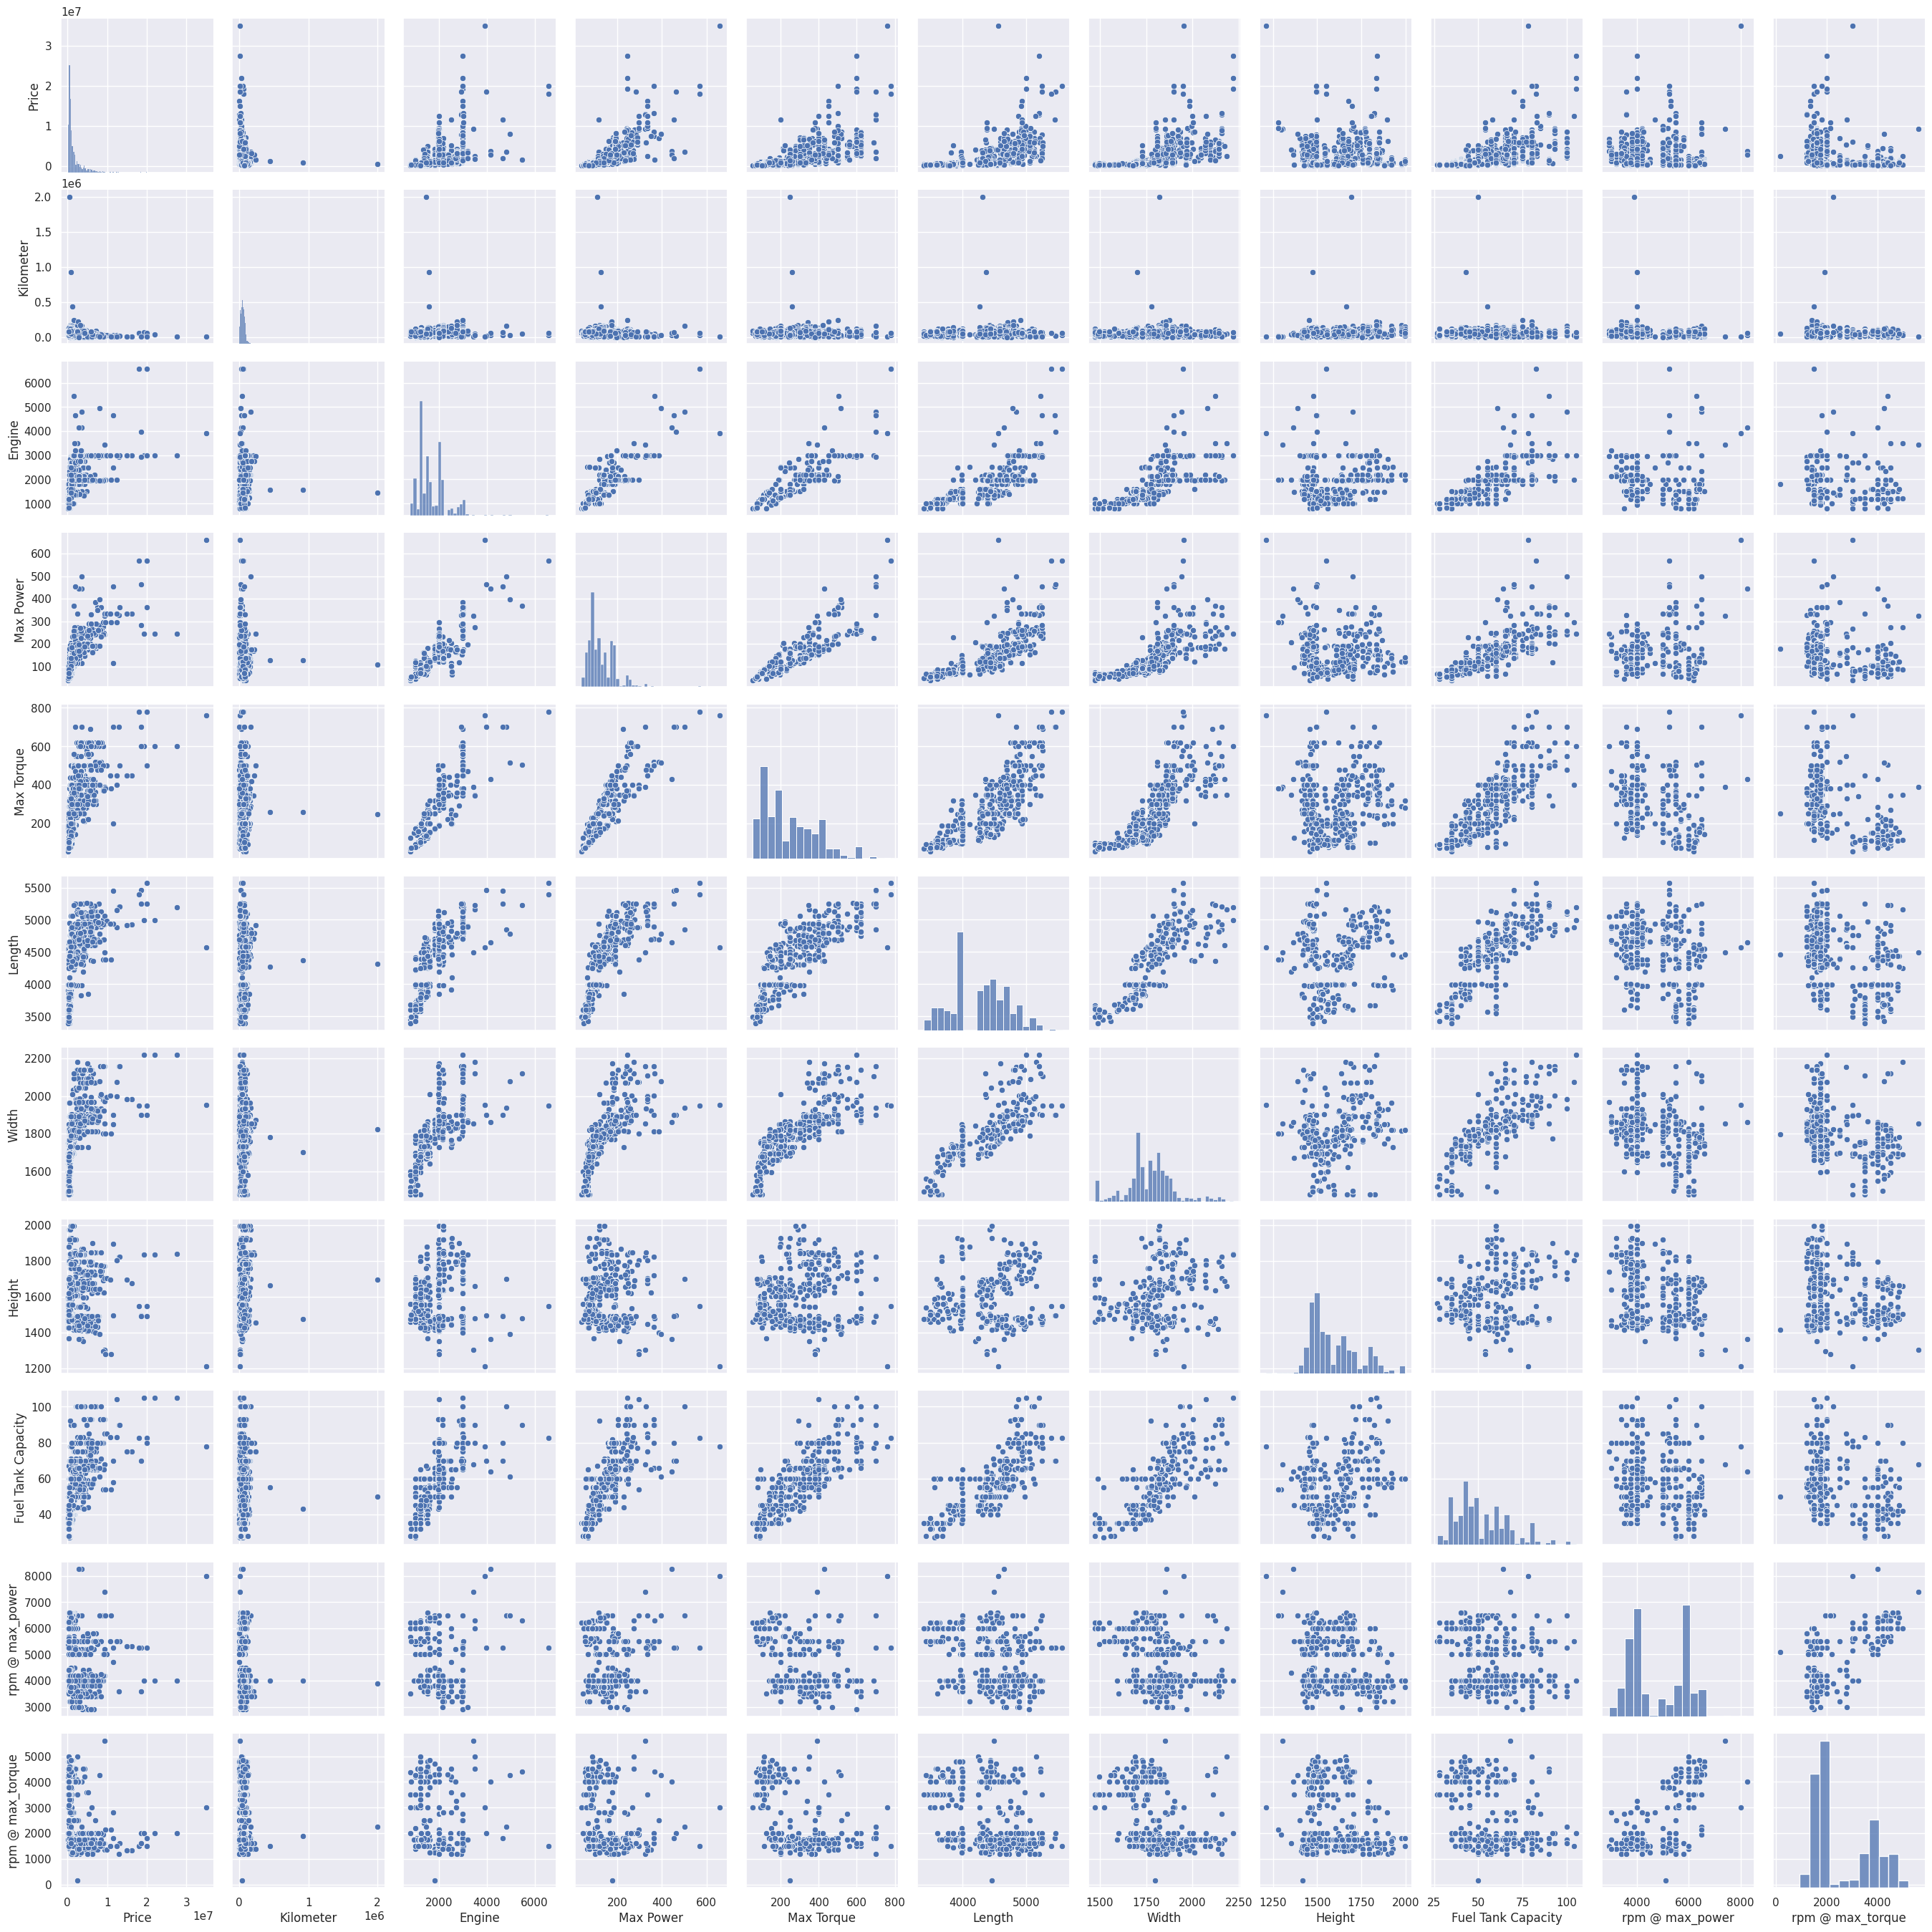

In [197]:
sns.pairplot(df)

<Axes: >

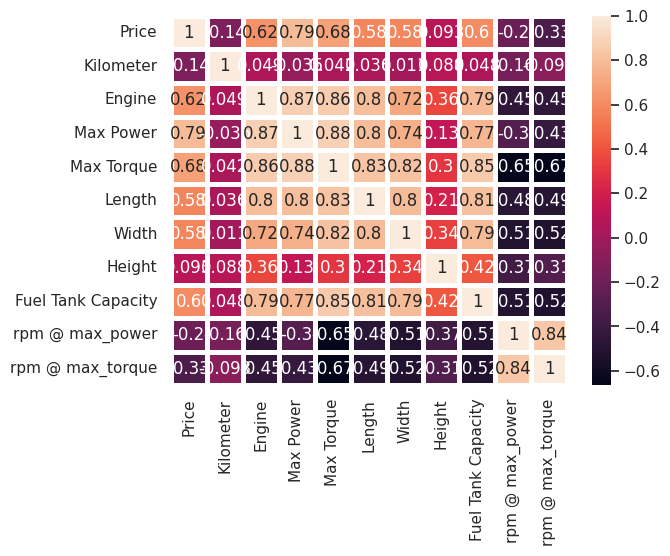

In [198]:
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 3.5)

In [199]:
fuel = pd.DataFrame(df1.groupby('Fuel Type')['Price'].mean().reset_index()).sort_values(by = 'Price', ascending = True)

In [200]:
df1['Fuel Type'].value_counts()

Diesel          927
Petrol          822
CNG              45
LPG               3
Hybrid            3
CNG + CNG         1
Petrol + CNG      1
Name: Fuel Type, dtype: int64

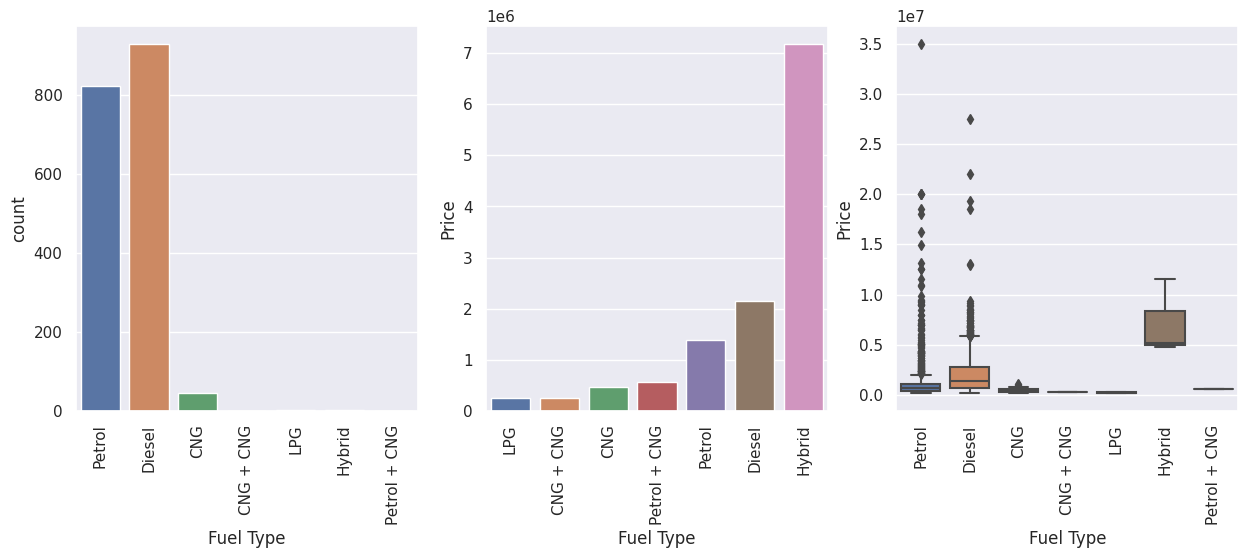

In [201]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x ='Fuel Type', data = df1, ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
sns.barplot(x = 'Fuel Type', y = 'Price' ,data = fuel, ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
sns.boxplot(x = 'Fuel Type', y ='Price',data = df1, ax = axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
plt.show()

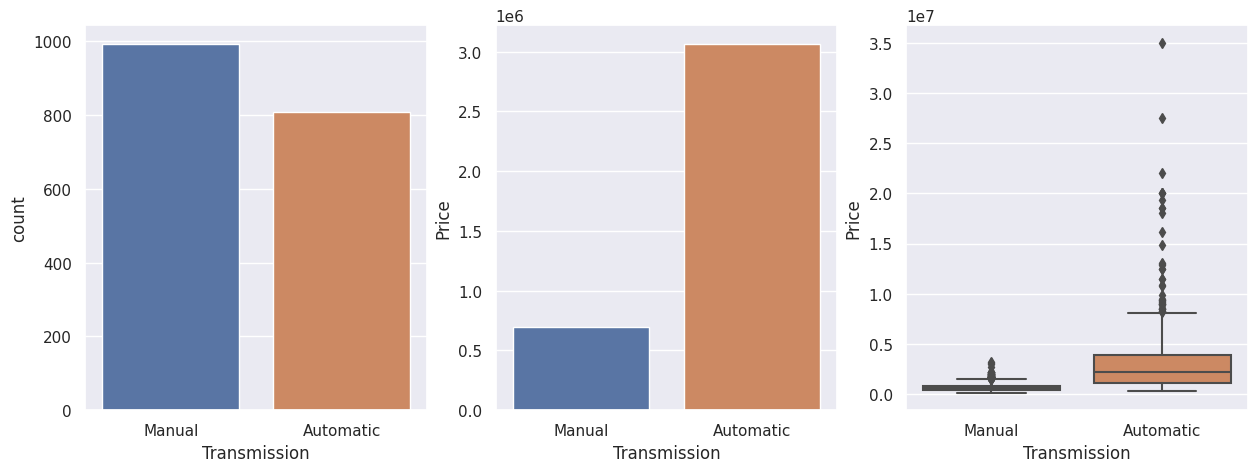

In [202]:
transm = pd.DataFrame(df1.groupby('Transmission')['Price'].mean().reset_index().sort_values(by = 'Price',ascending = True))

fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x ='Transmission', data = df1, ax = axes[0])
sns.barplot(x = 'Transmission', y = 'Price' ,data = transm, ax = axes[1])
sns.boxplot(x = 'Transmission', y ='Price',data = df1, ax = axes[2])
plt.show()

In [203]:
dt = pd.DataFrame(df1.groupby('Drivetrain')['Price'].mean().reset_index()).sort_values(by  ='Price', ascending = True)

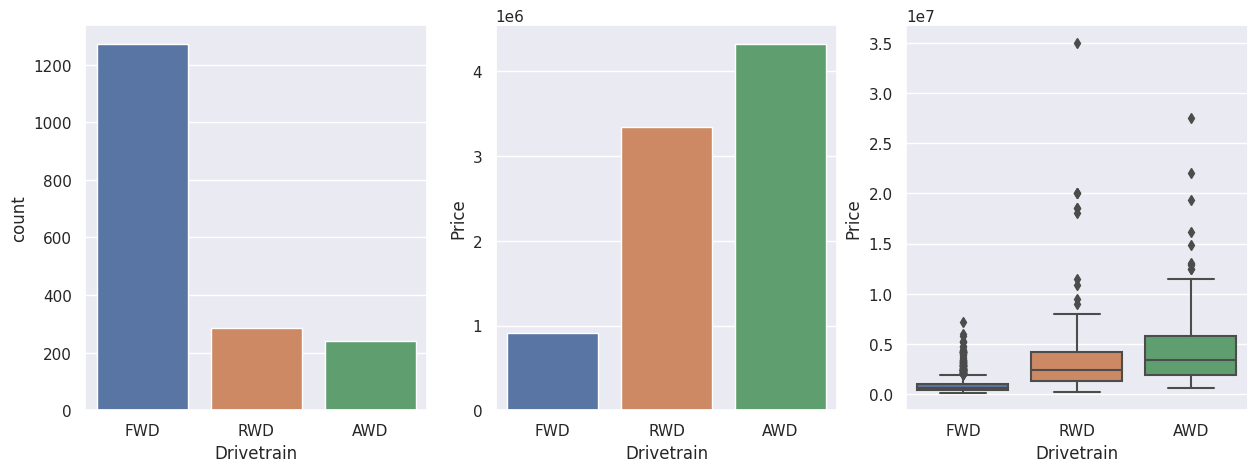

In [204]:

fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x ='Drivetrain', data = df1, ax = axes[0])
sns.barplot(x = 'Drivetrain', y = 'Price' ,data = dt, ax = axes[1])
sns.boxplot(x = 'Drivetrain', y ='Price',data = df1, ax = axes[2])
plt.show()

In [205]:
df1['Year'].value_counts()

2018    256
2017    253
2019    211
2016    182
2014    173
2015    167
2021    151
2020    122
2013    107
2022     75
2012     58
2011     36
2009      4
2010      4
2006      1
1988      1
2008      1
Name: Year, dtype: int64

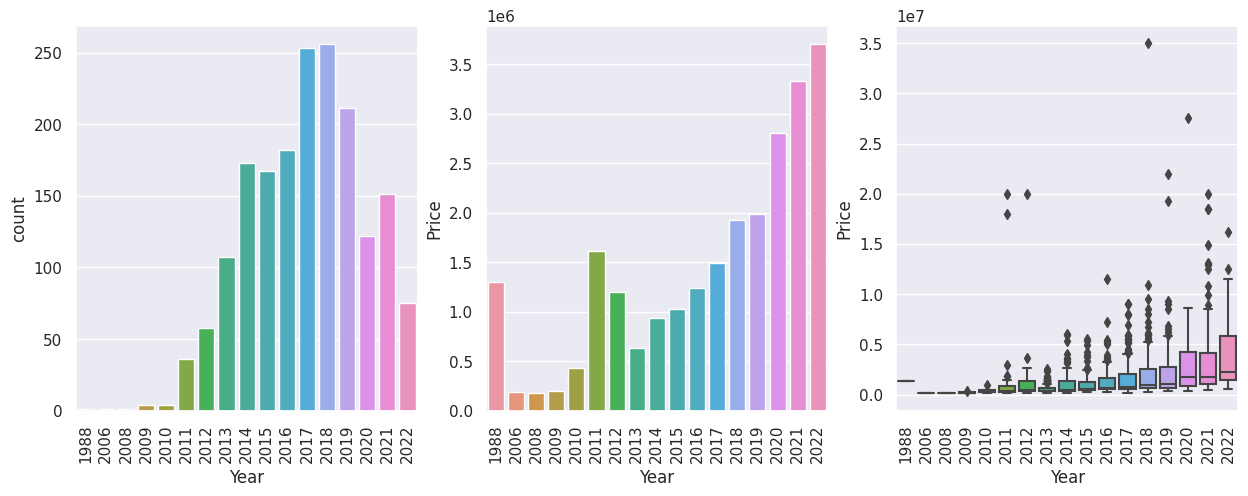

In [206]:
yr= pd.DataFrame(df1.groupby('Year')['Price'].mean().reset_index().sort_values(by = 'Price',ascending = True))

fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x ='Year', data = df1, ax = axes[0])
sns.barplot(x = 'Year', y = 'Price' ,data = yr, ax = axes[1])
sns.boxplot(x = 'Year', y ='Price',data = df1, ax = axes[2])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
plt.show()

In [207]:
df1['Color'].value_counts()

White     707
Silver    245
Grey      196
Blue      166
Red       143
Black     143
Brown      74
Maroon     32
Bronze     25
Gold       21
Orange     16
Others     11
Green      10
Yellow      6
Beige       5
Purple      2
Name: Color, dtype: int64

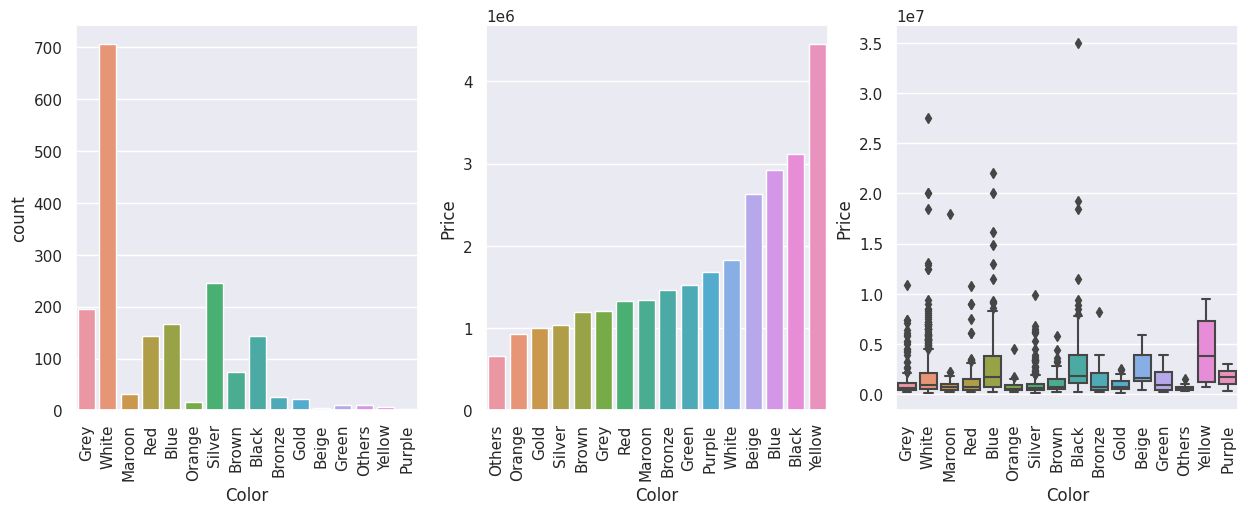

In [208]:
cl= pd.DataFrame(df1.groupby('Color')['Price'].mean().reset_index().sort_values(by = 'Price',ascending = True))

fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x ='Color', data = df1, ax = axes[0])
sns.barplot(x = 'Color', y = 'Price' ,data = cl, ax = axes[1])
sns.boxplot(x = 'Color', y ='Price',data = df1, ax = axes[2])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
plt.show()

In [209]:
df1['Seating Capacity'].value_counts()

5.0    1465
7.0     240
4.0      38
8.0      31
6.0      23
2.0       5
Name: Seating Capacity, dtype: int64

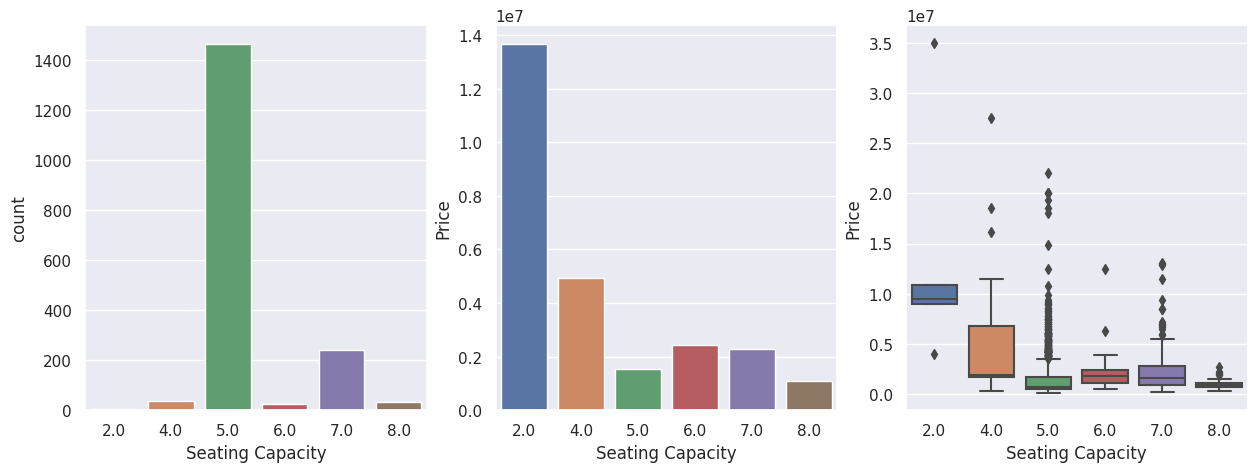

In [210]:
sc = pd.DataFrame(df1.groupby('Seating Capacity')['Price'].mean().reset_index().sort_values(by = 'Price',ascending = True))

fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x ='Seating Capacity', data = df1, ax = axes[0])
sns.barplot(x = 'Seating Capacity', y = 'Price' ,data = sc, ax = axes[1])
sns.boxplot(x = 'Seating Capacity', y ='Price',data = df1, ax = axes[2])

plt.show()

In [211]:
df1['Seller Type'].value_counts()

Individual                 1746
Corporate                    51
Commercial Registration       5
Name: Seller Type, dtype: int64

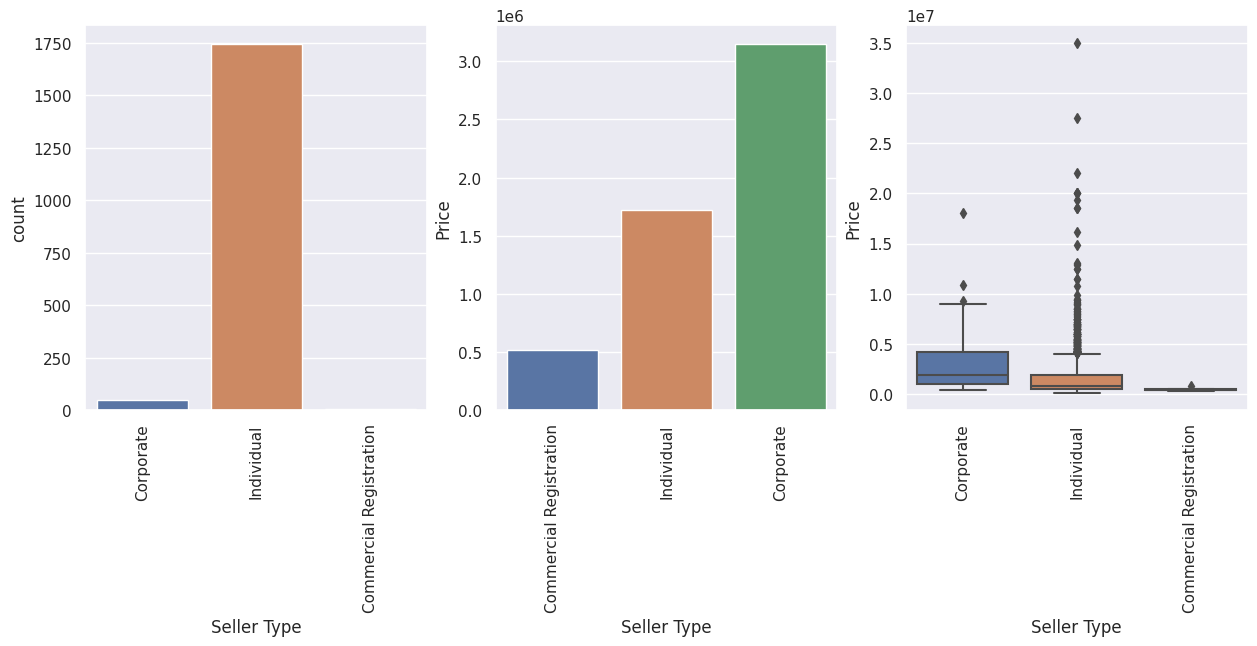

In [212]:
st = pd.DataFrame(df1.groupby('Seller Type')['Price'].mean().reset_index().sort_values(by = 'Price',ascending = True))

fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x ='Seller Type', data = df1, ax = axes[0])
sns.barplot(x = 'Seller Type', y = 'Price' ,data = st, ax = axes[1])
sns.boxplot(x = 'Seller Type', y ='Price',data = df1, ax = axes[2])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
plt.show()

In [213]:
df1['Owner'].value_counts()

First               1473
Second               290
Third                 23
UnRegistered Car      16
Name: Owner, dtype: int64

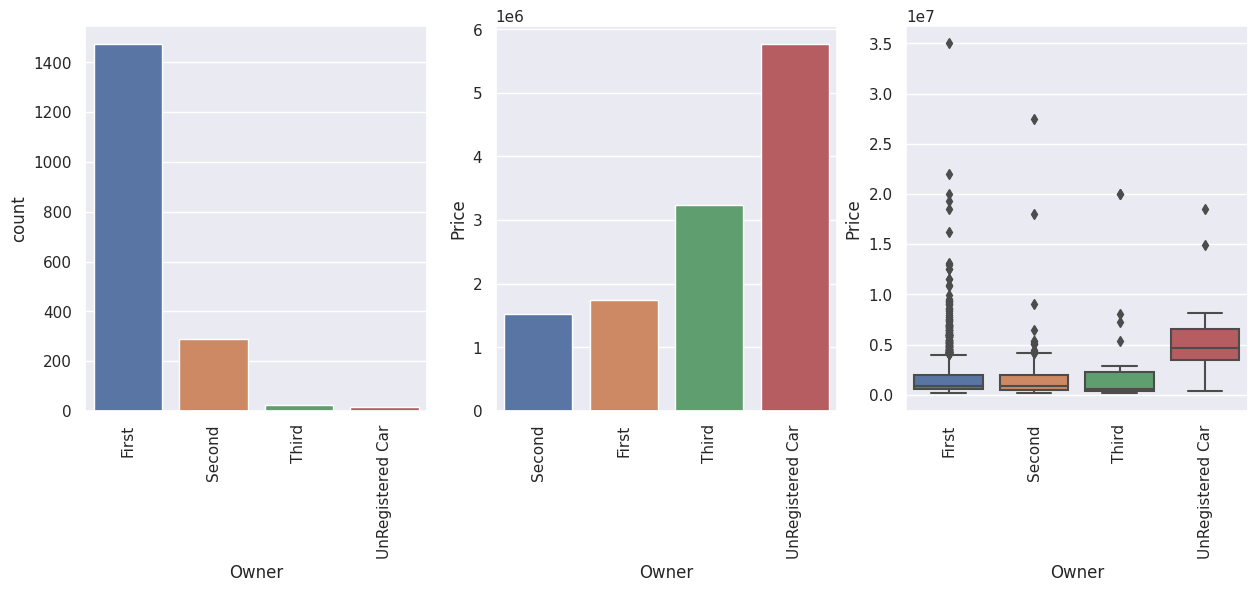

In [214]:
ow = pd.DataFrame(df1.groupby('Owner')['Price'].mean().reset_index().sort_values(by = 'Price',ascending = True))

fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x ='Owner', data = df1, ax = axes[0])
sns.barplot(x = 'Owner', y = 'Price' ,data = ow, ax = axes[1])
sns.boxplot(x = 'Owner', y ='Price',data = df1, ax = axes[2])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
plt.show()

In [215]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [216]:
categorical_columns = df1.select_dtypes(include='object').columns
num_categorical = len(categorical_columns)
association_matrix = np.zeros((num_categorical, num_categorical))

for i in range(num_categorical):
    for j in range(num_categorical):
        if i != j:
            v = cramers_v(df1[categorical_columns[i]], df1[categorical_columns[j]])
            association_matrix[i, j] = v

association_df = pd.DataFrame(association_matrix, index=categorical_columns, columns=categorical_columns)
print("Association Matrix of Cramer's V:")
print(association_df)

Association Matrix of Cramer's V:
                  Make     Model  Fuel Type  Transmission  Location     Color  \
Make          0.000000  0.706707   0.280596      0.662639  0.046208  0.156865   
Model         0.706707  0.000000   0.488274      0.700793  0.179313  0.209188   
Fuel Type     0.280596  0.488274   0.000000      0.182709  0.106521  0.099553   
Transmission  0.662639  0.700793   0.182709      0.000000  0.358150  0.260229   
Location      0.046208  0.179313   0.106521      0.358150  0.000000  0.000000   
Color         0.156865  0.209188   0.099553      0.260229  0.000000  0.000000   
Owner         0.175191  0.374625   0.069319      0.087921  0.147887  0.027753   
Seller Type   0.136136  0.180416   0.000000      0.113354  0.239521  0.000000   
Drivetrain    0.634109  0.700988   0.277257      0.438050  0.109372  0.194878   

                 Owner  Seller Type  Drivetrain  
Make          0.175191     0.136136    0.634109  
Model         0.374625     0.180416    0.700988  
Fuel 